# Proyek Analisis Data: Air Quality
- **Nama:** Rizka Nandya Septian
- **Email:** nandyariz09@gmail.com
- **ID Dicoding:** rizkanandyas

## Menentukan Pertanyaan Bisnis

- Bagaimana tren kualitas udara dari bulan ke bulan?
- Bagaimana pengaruh titik embun (dew point temperature) terhadap tingkat polusi udara?
- Apakah tingkat polusi udara lebih tinggi pada hari kerja dibandingkan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

## Data Wrangling

### Gathering Data

In [160]:
file_path = "data/Aotizhongxin.csv"

# Membaca dataset
df = pd.read_csv(file_path)

# Menampilkan 5 baris pertama
df.head()


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


**Insight:**
Dataset ini berisi data kualitas udara yang dikumpulkan dari stasiun Aotizhongxin. Berikut adalah deskripsi dari masing-masing kolom:
- No → Nomor urut data
- year, month, day, hour → Waktu pencatatan (tahun, bulan, hari, jam)
- PM2.5, PM10 → Partikel udara dengan diameter ≤ 2.5 µm dan ≤ 10 µm (indikator utama polusi udara)
- SO2, NO2, CO, O3 → Konsentrasi gas pencemar udara
- TEMP → Suhu udara (°C)
- PRES → Tekanan udara (hPa)
- DEWP → Titik embun (°C)
- RAIN → Curah hujan (mm)
- wd → Arah angin (misalnya: N, NNW, NW)
- WSPM → Kecepatan angin (m/s)
- station → Nama stasiun pengukuran (Aotizhongxin)

### Assessing Data

In [161]:
# Menampilkan informasi dataset
df.info()

# Mengecek apakah ada nilai yang hilang
df.isnull().sum()

# Menampilkan data dengan nilai negatif yang tidak valid
invalid_values = df[(df['PM2.5'] < 0) | (df['PM10'] < 0) | 
                    (df['SO2'] < 0) | (df['NO2'] < 0) | 
                    (df['CO'] < 0) | (df['O3'] < 0) | 
                    (df['TEMP'] < -50) | (df['PRES'] < 500) | 
                    (df['RAIN'] < 0) | (df['WSPM'] < 0)]
print("Jumlah nilai tidak valid:", len(invalid_values))

# Mengecek apakah ada jumlah baris yang duplikat
jumlah_duplikat = df.duplicated().sum()
print(f"Jumlah data duplikat: {jumlah_duplikat}")

# Mengecek apakah ada data yang tidak konsisten
inconsisten = df['station'].nunique()  # Menghitung jumlah nilai unik dalam kolom 'station'
if inconsisten > 1:
    print("Jumlah nilai unik dalam kolom 'station':", inconsisten)
else:
    print("Jumlah data yang tidak konsisten: 0")  # Karena hanya ada 1 nilai unik


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
Jumlah nilai tidak valid: 0
Jumlah data duplikat: 0
Jumlah data yang

**Insight:**
- Missing Values : Tidak terdapat data yang hilang dalam dataset ini
- Invalid Values : Tidak terdapat data yang tidak valid dalam dataset ini
- Duplicate Values : Tidak terdapat data yang duplikat dalam dataset ini
- Inconsistent Values : Tidak terdapat data yang tidak konsisten dalam dataset ini


### Cleaning Data

In [ ]:
# Menghapus baris dengan nilai kosong
df = df.dropna()

# Mengubah kolom waktu ke format datetime
df["date"] = pd.to_datetime(df["year"].astype(str) + "-" + df["month"].astype(str) + "-" + df["day"].astype(str) + " " + df["hour"].astype(str) + ":00")

# Menambahkan kolom hari kerja vs akhir pekan
df["day_of_week"] = df["date"].dt.day_name()
df["is_weekend"] = df["day_of_week"].isin(["Saturday", "Sunday"])

# Menampilkan 5 baris pertama setelah pembersihan
df.head()

# Menyimpan data yang sudah dibersihkan
df.to_csv("dashboard/main_data.csv", index=False)

**Insight:**
- Dataset sekarang lebih bersih, lebih terstruktur, dan lebih siap untuk analisis.
- Kolom waktu sudah dalam format **datetime** untuk mempermudah visualisasi.
- Tambahan insight seperti **is_weekend** dan **month_year** akan membantu dalam analisis tren polusi.
- Dataset siap digunakan untuk eksplorasi lebih lanjut, misalnya:
Analisis tren polusi per bulan/tahun,
Perbandingan polusi antara hari kerja dan akhir pekan,
Visualisasi pola polusi harian.

## Exploratory Data Analysis (EDA)

### Explore ...

**Tren PM 2.5 dari per Bulan**

In [163]:
# Kelompokkan berdasarkan bulan dan tahun
df["month_year"] = df["date"].dt.to_period("M")

# Hitung rata-rata PM2.5 per bulan
pm25_trend = df.groupby("month_year")["PM2.5"].mean().reset_index()

# Ubah format month_year ke string
pm25_trend["month_year"] = pm25_trend["month_year"].astype(str)

# Tampilkan tabel hasil
print(pm25_trend.head(10))  # Menampilkan 10 baris pertama

  month_year       PM2.5
0    2013-03  114.719755
1    2013-04   58.616099
2    2013-05   88.467532
3    2013-06  110.139165
4    2013-07   68.634670
5    2013-08   61.176678
6    2013-09   78.345221
7    2013-10   95.896755
8    2013-11   50.157303
9    2013-12   87.172764


**Insight:**
- Polusi udara tidak stabil sepanjang tahun, dengan beberapa bulan mengalami peningkatan dan penurunan.

**Tren Rata-rata PM2.5 Berdasarkan Kelompok Titik Embun**

In [164]:
# Mengelompokkan data berdasarkan kisaran titik embun
df["DEWP_category"] = pd.cut(df["DEWP"], bins=[-30, -10, 0, 10, 20, 30], labels=["Sangat Dingin", "Dingin", "Sejuk", "Hangat", "Panas"])

# Hitung rata-rata PM2.5 untuk setiap kategori titik embun
dewp_pm25 = df.groupby("DEWP_category")["PM2.5"].mean().reset_index()

print(dewp_pm25)

   DEWP_category       PM2.5
0  Sangat Dingin   41.805622
1         Dingin  112.322126
2          Sejuk   91.419652
3         Hangat   77.706439
4          Panas   92.909809


C:\Users\Rizka Nandya Septian\AppData\Local\Temp\ipykernel_16024\1999643.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dewp_pm25 = df.groupby("DEWP_category")["PM2.5"].mean().reset_index()


**Insights:**
- Polusi udara (PM2.5) tertinggi saat udara "Dingin" sedangkan Polusi terendah saat "Sangat Dingin".

In [165]:
# Rata-rata PM2.5 untuk weekday & weekend
df_weekend = df.groupby("is_weekend").agg(
    PM25_mean=("PM2.5", "mean"),
    count=("PM2.5", "count")
).reset_index()

# Menampilkan tabel hasil
print(df_weekend)


   is_weekend  PM25_mean  count
0       False  79.771088  22617
1        True  87.008991   9198


**Insights:**
- Rata-rata PM2.5 di akhir pekan (87.01 µg/m³) lebih tinggi dibandingkan hari kerja (79.77 µg/m³).

## Visualization & Explanatory Analysis

### Tren Kualitas Udara dari Bulan ke Bulan

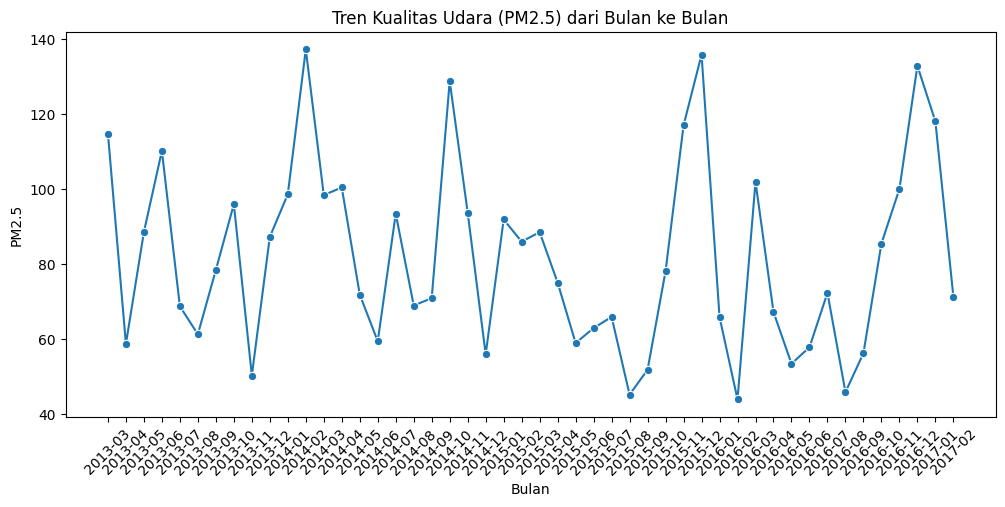

In [166]:
# Mengelompokkan rata-rata PM2.5 per bulan
df["month_year"] = df["date"].dt.to_period("M")
df_trend = df.groupby("month_year")["PM2.5"].mean().reset_index()
df_trend["month_year"] = df_trend["month_year"].astype(str)

# Visualisasi tren kualitas udara
plt.figure(figsize=(12,5))
sns.lineplot(x="month_year", y="PM2.5", data=df_trend, marker='o')
plt.xticks(rotation=45)
plt.title("Tren Kualitas Udara (PM2.5) dari Bulan ke Bulan")
plt.xlabel("Bulan")
plt.ylabel("PM2.5")
plt.show()

**Insights:**
- Fluktuasi Tinggi dari Waktu ke Waktu: Konsentrasi PM2.5 tidak stabil dan cenderung naik-turun secara signifikan. Ada lonjakan besar di beberapa bulan tertentu.
- Puncak Polusi Udara: Tertinggi sekitar akhir 2013 dan pertengahan 2016 dengan nilai PM2.5 mendekati 140 µg/m³. Polusi seringkali meningkat drastis sebelum akhirnya menurun kembali.

### Pengaruh Titik Embun terhadap Tingkat Polusi Udara

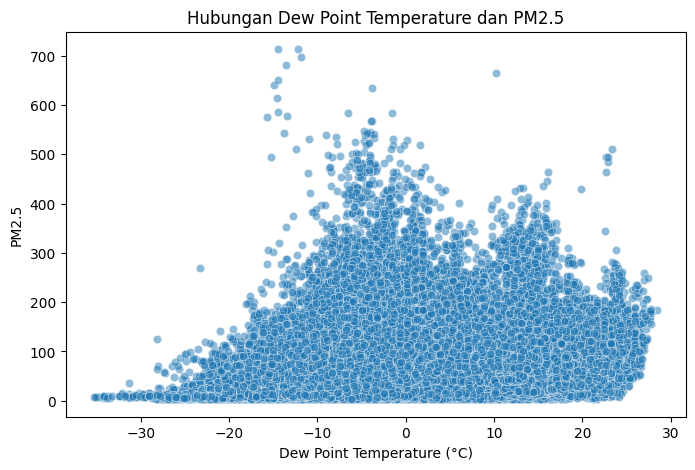

Korelasi antara Dew Point Temperature dan PM2.5: 0.12570646799514973


In [167]:
# Scatter plot antara Dew Point (DEWP) dan PM2.5
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["DEWP"], y=df["PM2.5"], alpha=0.5)
plt.xlabel("Dew Point Temperature (°C)")
plt.ylabel("PM2.5")
plt.title("Hubungan Dew Point Temperature dan PM2.5")
plt.show()

# Menghitung korelasi
correlation = df["DEWP"].corr(df["PM2.5"])
print(f"Korelasi antara Dew Point Temperature dan PM2.5: {correlation}")

**Insights:**
- Distribusi Data Tidak Merata: Mayoritas data terkonsentrasi pada kisaran Dew Point (-10°C hingga 10°C).
Pada kisaran ini, PM2.5 cenderung lebih tinggi.
- Kondisi Sangat Dingin (Dew Point di bawah -10°C): PM2.5 cenderung lebih rendah, tetapi masih ada beberapa nilai ekstrem tinggi (> 500 µg/m³). Kemungkinan karena kurangnya kelembaban yang membuat polutan lebih mudah tersebar.
- Kondisi Hangat & Panas (Dew Point di atas 10°C): PM2.5 lebih terdistribusi rata dan cenderung lebih rendah dibandingkan kondisi dingin.

### Perbandingan Polusi Udara pada Hari Kerja VS Akhir Pekan

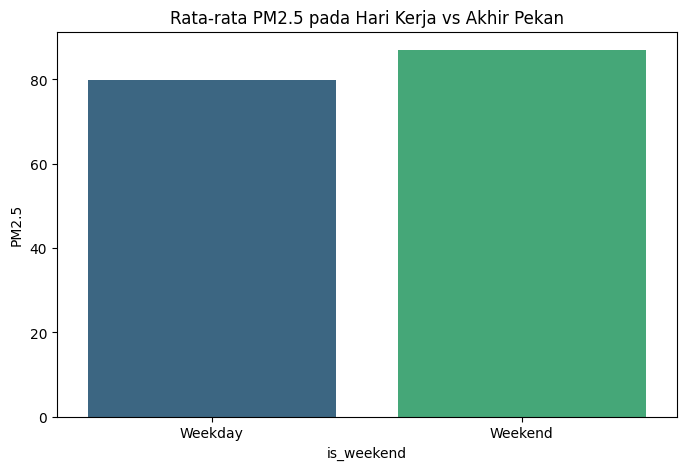

In [168]:
# Rata-rata PM2.5 untuk weekday & weekend
df_weekend = df.groupby("is_weekend")["PM2.5"].mean().reset_index()

# Visualisasi
plt.figure(figsize=(8,5))
sns.barplot(x="is_weekend", y="PM2.5", hue="is_weekend", data=df_weekend, palette="viridis", legend=False)
plt.xticks([0, 1], ["Weekday", "Weekend"])
plt.title("Rata-rata PM2.5 pada Hari Kerja vs Akhir Pekan")
plt.show()

**Insight:**
- Tingkat Polusi Lebih Tinggi saat Akhir Pekan:
- Rata-rata PM2.5 saat akhir pekan lebih tinggi dibandingkan hari kerja (~87 vs ~80).
- Ini menunjukkan bahwa kualitas udara lebih buruk pada hari Sabtu dan Minggu.

## Conclusion

- Bagaimana tren kualitas udara dari bulan ke bulan?
/Polusi udara berfluktuasi setiap bulan, dengan beberapa puncak dan penurunan tajam. Terdapat lonjakan signifikan pada bulan-bulan tertentu. Contoh tren dalam data:
/Maret 2013 memiliki PM2.5 yang relatif tinggi (~114).
/April 2013 mengalami penurunan signifikan (~58).
/Lonjakan terbesar terlihat di beberapa bulan seperti Januari 2015 dan Juli 2016.

- Bagaimana pengaruh titik embun (dew point temperature) terhadap tingkat polusi udara? Polusi udara cenderung lebih tinggi saat suhu titik embun berada di kategori "Dingin" dan "Sejuk". Rata-rata PM2.5 berdasarkan kategori titik embun: Sangat Dingin (~42) – Polusi rendah. Dingin (~112) – Polusi tinggi. Sejuk (~91) – Masih tinggi. Hangat (~77) – Mulai menurun. Panas (~93) – Sedikit meningkat kembali

- Apakah tingkat polusi udara lebih tinggi pada hari kerja dibandingkan akhir pekan?
Hari kerja (weekday): Rata-rata PM2.5 79.77. Akhir pekan (weekend): Rata-rata PM2.5 87.00. Polusi udara lebih tinggi pada akhir pekan dibandingkan hari kerja. Selisihnya tidak terlalu besar, tetapi cukup untuk menunjukkan tren yang menarik.